<a href="https://colab.research.google.com/github/Aravinda89/Pytorch-Tutorial/blob/main/04_03_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation

In [2]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [3]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [5]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.033817462257739


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [7]:
ps = torch.exp(logps)
ps

tensor([[5.5443e-06, 4.7890e-06, 6.5491e-05, 2.0465e-05, 1.1008e-04, 4.3842e-01,
         9.2623e-05, 2.1943e-01, 1.3976e-02, 3.2788e-01]])

In [8]:
nps = ps.numpy()[0]
nps

array([5.5443261e-06, 4.7890344e-06, 6.5491033e-05, 2.0464893e-05,
       1.1007607e-04, 4.3841717e-01, 9.2622744e-05, 2.1942756e-01,
       1.3975811e-02, 3.2788047e-01], dtype=float32)

<BarContainer object of 10 artists>

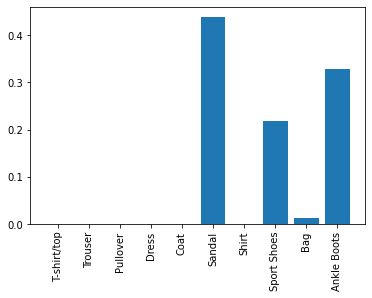

In [9]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

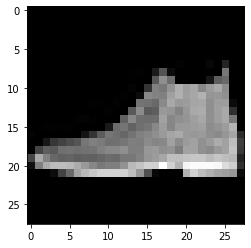

In [10]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [11]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[5.5443e-06, 4.7890e-06, 6.5491e-05, 2.0465e-05, 1.1008e-04, 4.3842e-01,
         9.2623e-05, 2.1943e-01, 1.3976e-02, 3.2788e-01],
        [1.8087e-03, 8.2802e-05, 6.9258e-01, 2.5334e-04, 1.0028e-01, 2.9872e-05,
         2.0321e-01, 3.7616e-07, 1.7442e-03, 1.3326e-05],
        [2.6016e-05, 9.9686e-01, 5.7174e-05, 2.5875e-03, 4.5957e-04, 3.9138e-07,
         1.3089e-05, 3.8666e-07, 7.4022e-08, 1.2175e-08],
        [6.8773e-05, 9.9153e-01, 1.2605e-04, 7.7586e-03, 4.7240e-04, 4.2160e-06,
         3.2146e-05, 2.6326e-06, 2.7668e-07, 7.5516e-08],
        [1.0252e-01, 2.6468e-03, 2.1942e-01, 2.7684e-02, 3.9128e-02, 1.7020e-03,
         5.9591e-01, 3.5339e-05, 1.0842e-02, 1.1047e-04],
        [1.3902e-03, 9.7016e-01, 1.5362e-03, 1.7908e-02, 8.0867e-03, 5.3380e-06,
         9.0464e-04, 2.1206e-06, 3.2678e-06, 2.1021e-07],
        [6.5127e-02, 8.3283e-03, 2.5318e-01, 1.7197e-02, 1.9699e-01, 2.4610e-03,
         4.5293e-01, 4.0487e-05, 3.7282e-03, 2.2237e-05],
        [1.3935e-02, 2.5314

In [12]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [16]:
len(images)

16

In [15]:
output.shape

torch.Size([16, 10])

In [13]:
pred, labels

(tensor([3, 3, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [17]:
pred == labels

tensor([ True, False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [18]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 76.46% 
